In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import folium
from folium import plugins
import os
import shutil

#!pip install jupyternotify
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
## Run %%notify to create notification for completed cell
%notify

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
station = pd.read_csv('Data/cycle-share-dataset/station.csv')
trip = pd.read_csv('Data/cycle-share-dataset/trip.csv', error_bad_lines=False)
weather = pd.read_csv('Data/cycle-share-dataset/weather.csv', parse_dates=[0], index_col=[0])

b'Skipping line 50794: expected 12 fields, saw 20\n'


In [3]:
station.head()

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN


In [4]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 9 columns):
station_id           58 non-null object
name                 58 non-null object
lat                  58 non-null float64
long                 58 non-null float64
install_date         58 non-null object
install_dockcount    58 non-null int64
modification_date    17 non-null object
current_dockcount    58 non-null int64
decommission_date    4 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 4.2+ KB


In [7]:
station['install_date'] = pd.to_datetime(station['install_date'])

In [6]:
trip.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [8]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 12 columns):
trip_id              286857 non-null int64
starttime            286857 non-null object
stoptime             286857 non-null object
bikeid               286857 non-null object
tripduration         286857 non-null float64
from_station_name    286857 non-null object
to_station_name      286857 non-null object
from_station_id      286857 non-null object
to_station_id        286857 non-null object
usertype             286857 non-null object
gender               181557 non-null object
birthyear            181553 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 26.3+ MB


In [9]:
trip['starttime'] = pd.to_datetime(trip['starttime'])
trip['stoptime'] = pd.to_datetime(trip['stoptime'])
trip['tripduration'] = pd.to_timedelta(trip['tripduration'], unit='s')

In [10]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 12 columns):
trip_id              286857 non-null int64
starttime            286857 non-null datetime64[ns]
stoptime             286857 non-null datetime64[ns]
bikeid               286857 non-null object
tripduration         286857 non-null timedelta64[ns]
from_station_name    286857 non-null object
to_station_name      286857 non-null object
from_station_id      286857 non-null object
to_station_id        286857 non-null object
usertype             286857 non-null object
gender               181557 non-null object
birthyear            181553 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(1), object(7), timedelta64[ns](1)
memory usage: 26.3+ MB


In [11]:
trip.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,00:16:25.935000,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,00:15:26.375000,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,00:14:43.831000,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,00:14:25.937000,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,00:15:23.923000,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [12]:
weather.head()

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
Date,,,,,,,,,,,,,,,,,,,,
2014-10-13,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.00,Rain
2014-10-14,63,59.0,55,52,51,50,88,78,63,29.84,29.75,29.54,10,9,3,10,5,17,0.11,Rain
2014-10-15,62,58.0,54,53,50,46,87,77,67,29.98,29.71,29.51,10,9,3,18,7,25,0.45,Rain
2014-10-16,71,61.0,52,49,46,42,83,61,36,30.03,29.95,29.81,10,10,10,9,4,-,0.00,Rain
2014-10-17,64,60.0,57,55,51,41,87,72,46,29.83,29.78,29.73,10,10,6,8,3,-,0.14,Rain


In [13]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 689 entries, 2014-10-13 to 2016-08-31
Data columns (total 20 columns):
Max_Temperature_F             689 non-null int64
Mean_Temperature_F            688 non-null float64
Min_TemperatureF              689 non-null int64
Max_Dew_Point_F               689 non-null int64
MeanDew_Point_F               689 non-null int64
Min_Dewpoint_F                689 non-null int64
Max_Humidity                  689 non-null int64
Mean_Humidity                 689 non-null int64
Min_Humidity                  689 non-null int64
Max_Sea_Level_Pressure_In     689 non-null float64
Mean_Sea_Level_Pressure_In    689 non-null float64
Min_Sea_Level_Pressure_In     689 non-null float64
Max_Visibility_Miles          689 non-null int64
Mean_Visibility_Miles         689 non-null int64
Min_Visibility_Miles          689 non-null int64
Max_Wind_Speed_MPH            689 non-null int64
Mean_Wind_Speed_MPH           689 non-null int64
Max_Gust_Speed_MPH            504 n

Text(0, 0.5, 'Average Temperature (Farenheit)')

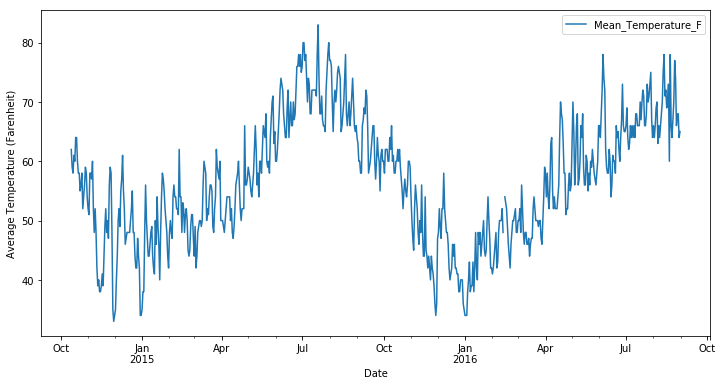

In [14]:
plt.figure(figsize=(12,6))
weather.Mean_Temperature_F.plot()
plt.legend(loc=0)
plt.ylabel('Average Temperature (Farenheit)')

In [15]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 9 columns):
station_id           58 non-null object
name                 58 non-null object
lat                  58 non-null float64
long                 58 non-null float64
install_date         58 non-null datetime64[ns]
install_dockcount    58 non-null int64
modification_date    17 non-null object
current_dockcount    58 non-null int64
decommission_date    4 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 4.2+ KB


In [16]:
station.head()

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,2014-10-13,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,2014-10-13,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,2014-10-13,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,2014-10-13,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,2014-10-13,20,NaN,20,NaN


In [17]:
marks = station
marks['install_date'] = pd.to_datetime(marks['install_date'])
marks['modification_date'] = pd.to_datetime(marks['modification_date'])
marks['decommission_date'] = pd.to_datetime(marks['decommission_date'])
marks = marks.drop(columns=['lat', 'long'])
marks.head()

,station_id,name,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,2014-10-13,18,NaT,18,NaT
1,BT-03,2nd Ave & Vine St,2014-10-13,16,NaT,16,NaT
2,BT-04,6th Ave & Blanchard St,2014-10-13,16,NaT,16,NaT
3,BT-05,2nd Ave & Blanchard St,2014-10-13,14,NaT,14,NaT
4,CBD-03,7th Ave & Union St,2014-10-13,20,NaT,20,NaT


In [18]:
list(marks.loc[0])

['BT-01',
 '3rd Ave & Broad St',
 Timestamp('2014-10-13 00:00:00'),
 18,
 NaT,
 18,
 NaT]

In [19]:
locations = station[['lat', 'long']]
locationlist = locations.values.tolist()
print("Number of Locations: ", len(locationlist))
print("Station ID: {}, Station Name: {}, Location: {}".format(marks['station_id'][3],
                                                                 marks['name'][3], 
                                                                 locationlist[3]))

Number of Locations:  58
Station ID: BT-05, Station Name: 2nd Ave & Blanchard St, Location: [47.61311, -122.34420800000001]


In [20]:
cycle_map=None

In [21]:
import glob
map_files = glob.glob("./Maps/*.html")
map_files

['./Maps/airbnb_cluster.html',
 './Maps/airbnb_crime_map.html',
 './Maps/airbnb_ind_1.html',
 './Maps/crime_districts.html',
 './Maps/bike_map_1.html',
 './Maps/crime_clusters.html',
 './Maps/clusters_map_1.html']

In [26]:
cycle_map=folium.Map(location=[station.lat.mean(),station.long.mean()],
                          zoom_start=12.5,tiles='OpenStreetMap')
for point in range(0, len(locationlist)):
    folium.CircleMarker(locationlist[point], popup=folium.Popup((marks.loc[point]['name']))
                            , fill=True).add_to(cycle_map)
    cycle_map.save(os.path.join('Maps/', 'bike_map_1.html'))
    plugins.ScrollZoomToggler().add_to(cycle_map)

cycle_map

In [27]:
clusters=folium.Map(location=[station.lat.mean(),station.long.mean()],
                      zoom_start=12.5,tiles='OpenStreetMap')
plugins.MarkerCluster(locationlist).add_to(clusters)
plugins.ScrollZoomToggler().add_to(clusters)
clusters.save(os.path.join('Maps/', 'clusters_map_1.html'))
clusters

In [28]:
from folium import Html
from IPython.core.display import display_html, HTML

In [29]:
with open("./Maps/airbnb_cluster.html") as f:
    data_map = f.read()

In [32]:
if (not os.path.exists('Maps/bike_map_1.html')):
    cycle_map=folium.Map(location=[station.lat.mean(),station.long.mean()],
                          zoom_start=13,tiles='OpenStreetMap')
    for point in range(0, len(locationlist)):
        folium.CircleMarker(locationlist[point], popup=folium.Popup((marks.loc[point]['name']))
                            , fill=True).add_to(cycle_map)
    cycle_map.save(os.path.join('Maps/', 'bike_map_1.html'))
    plugins.ScrollZoomToggler().add_to(cycle_map)

cycle_map

In [33]:
trip.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,00:16:25.935000,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,00:15:26.375000,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,00:14:43.831000,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,00:14:25.937000,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,00:15:23.923000,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [34]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 12 columns):
trip_id              286857 non-null int64
starttime            286857 non-null datetime64[ns]
stoptime             286857 non-null datetime64[ns]
bikeid               286857 non-null object
tripduration         286857 non-null timedelta64[ns]
from_station_name    286857 non-null object
to_station_name      286857 non-null object
from_station_id      286857 non-null object
to_station_id        286857 non-null object
usertype             286857 non-null object
gender               181557 non-null object
birthyear            181553 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(1), object(7), timedelta64[ns](1)
memory usage: 26.3+ MB


In [35]:
trip.from_station_id.value_counts()

WF-01            13054
CH-07            11392
BT-01            10934
CBD-13           10049
SLU-15            9994
CH-02             9639
CH-08             9468
SLU-01            8382
BT-03             8168
CH-05             7680
SLU-19            7486
SLU-07            7206
SLU-02            6937
CH-01             6768
CH-03             6576
WF-04             6357
CH-15             6322
BT-05             6270
SLU-16            6060
EL-03             5747
CH-09             5698
SLU-17            5676
SLU-04            5673
PS-04             5647
CBD-05            5626
CBD-03            5555
CH-12             5548
CBD-06            5464
DPD-01            5161
BT-04             4684
                 ...  
FH-04             4077
PS-05             3868
CH-06             3837
UD-01             3784
EL-05             3645
CBD-07            3632
UD-04             3630
EL-01             3580
FH-01             3282
UW-04             2801
ID-04             2731
CBD-04            2693
UW-06      

In [36]:
trip.to_station_id.value_counts()

CBD-13           13784
WF-01            13736
SLU-15           10961
BT-01            10737
SLU-07           10632
PS-04             9584
SLU-04            9305
SLU-16            9114
WF-04             8931
CBD-05            8713
SLU-01            8671
CBD-06            8539
SLU-19            8067
SLU-02            7497
EL-03             7274
CBD-03            7268
DPD-01            6968
PS-05             6744
BT-03             6457
BT-05             6367
CH-08             6196
SLU-17            6110
CH-02             5847
UD-04             4807
EL-05             4714
ID-04             4612
UD-01             4309
BT-04             4066
EL-01             4061
CH-12             4001
                 ...  
CH-01             3918
CH-09             3743
CH-03             3617
SLU-18            3556
CH-07             3408
UW-04             3152
FH-04             3076
CBD-04            2819
UW-06             2565
CH-15             2419
CH-05             2391
SLU-20            2149
UW-07      

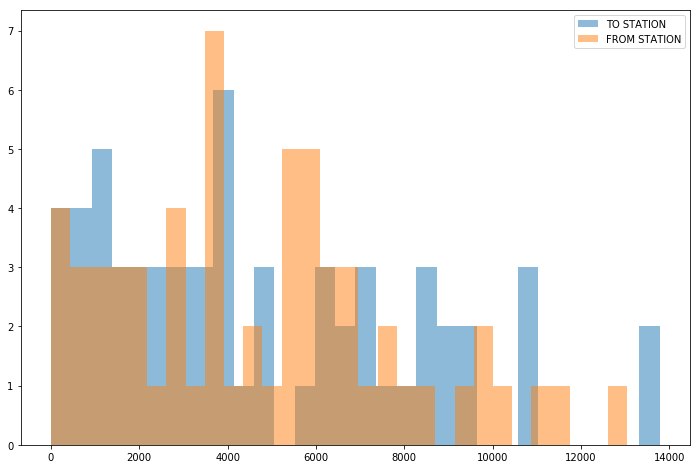

In [37]:
plt.figure(figsize=(12, 8))
plt.hist(trip.to_station_id.value_counts(), bins=30, alpha=0.5, label='TO STATION')
plt.hist(trip.from_station_id.value_counts(), bins=30, alpha=0.5, label='FROM STATION')
plt.legend(loc=0)
plt.show()

In [ ]:
# # Folium plugin for full screen option to be rendered on map

# plugins.Fullscreen(
#     position='topright',
#     title='Expand me',
#     title_cancel='Exit me',
#     force_separate_button=True
# ).add_to(m)